In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

xlsx = pd.ExcelFile('giggles_df.xlsx')
giggles_df = pd.read_excel(xlsx)
giggles_df

,CountryIndex,YearCountry,Country,Year,Gold,Silver,Bronze,Total,Athletes,Population,GDP,Latitude,Longitude,Altitude(meters),Host,Bins
0,1,2000Armenia,Armenia,2000,0,0,1,1,3,3169445,1.91,40.769627,44.673665,2359,0,1
1,2,2000Barbados,Barbados,2000,0,0,1,1,11,268906,2.56,13.193887,-59.543198,168,0,1
2,3,2000Cameroon,Cameroon,2000,1,0,0,1,11,15139138,10.08,4.612552,13.153811,667,0,1
3,4,2000Chile,Chile,2000,0,0,1,1,7,15411830,75.21,-31.761336,-71.318770,610,0,1
4,5,2000Colombia,Colombia,2000,1,0,0,1,11,43193863,15.95,2.889443,-73.783892,255,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,2004United States,United States,2004,36,39,26,101,140,293694333,11797.80,39.783730,-100.445882,829,0,4
502,503,2012United States,United States,2012,46,29,29,104,54,29123400,15094.00,39.783730,-100.445882,829,0,4
503,504,2008United States,United States,2008,36,39,37,112,121,313382000,14219.30,39.783730,-100.445882,829,0,4
504,505,2020United States,United States,2020,39,41,33,113,613,331002651,19485.39,39.783730,-100.445882,829,0,4


In [3]:
inputs = ["Year", "Athletes", "GDP",'Bins']
X = giggles_df[inputs]
y = giggles_df[['CountryIndex']]
print(X.shape, y.shape)

(506, 4) (506, 1)


In [4]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y)
### END SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [5]:
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor((20, 20, 20, 20), max_iter = 500).fit(X_train, np.array(y_train['CountryIndex']))

In [6]:
regr.score(X_test, y_test)

0.45668747393140585

In [7]:
guessColName = 'guess_index'
giggles_df[guessColName]=regr.predict(giggles_df[inputs])

#reorder columns
d = {col : giggles_df[col] for col in giggles_df.columns if col != 'CountryIndex' and col != 'guess_index'}
lastCols = ['CountryIndex', guessColName]
for col in lastCols:
    d[col] = giggles_df[col]
pd.DataFrame(d)

,YearCountry,Country,Year,Gold,Silver,Bronze,Total,Athletes,Population,GDP,Latitude,Longitude,Altitude(meters),Host,Bins,CountryIndex,guess_index
0,2000Armenia,Armenia,2000,0,0,1,1,3,3169445,1.91,40.769627,44.673665,2359,0,1,1,135.252034
1,2000Barbados,Barbados,2000,0,0,1,1,11,268906,2.56,13.193887,-59.543198,168,0,1,2,154.022110
2,2000Cameroon,Cameroon,2000,1,0,0,1,11,15139138,10.08,4.612552,13.153811,667,0,1,3,155.348997
3,2000Chile,Chile,2000,0,0,1,1,7,15411830,75.21,-31.761336,-71.318770,610,0,1,4,157.513348
4,2000Colombia,Colombia,2000,1,0,0,1,11,43193863,15.95,2.889443,-73.783892,255,0,1,5,156.384745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2004United States,United States,2004,36,39,26,101,140,293694333,11797.80,39.783730,-100.445882,829,0,4,502,459.881681
502,2012United States,United States,2012,46,29,29,104,54,29123400,15094.00,39.783730,-100.445882,829,0,4,503,490.707076
503,2008United States,United States,2008,36,39,37,112,121,313382000,14219.30,39.783730,-100.445882,829,0,4,504,490.478609
504,2020United States,United States,2020,39,41,33,113,613,331002651,19485.39,39.783730,-100.445882,829,0,4,505,560.163376


In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.fit(X_train_scaled, y_train)
### END SOLUTION

LinearRegression()

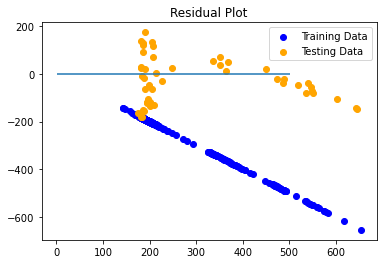

In [11]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
#model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [12]:
model.predict(X_test_scaled)

array([[183.2751485 ],
       [185.12733498],
       [546.76917824],
       [193.68024101],
       [473.98842191],
       [203.49963084],
       [186.83041448],
       [204.29765946],
       [550.78815694],
       [642.51123422],
       [214.12393887],
       [181.54912078],
       [367.49341755],
       [209.93164014],
       [207.77242105],
       [518.88878391],
       [189.75929766],
       [351.0702334 ],
       [225.90148678],
       [486.60247961],
       [247.87984702],
       [207.26503232],
       [188.33085564],
       [539.34391714],
       [351.64472142],
       [548.87711461],
       [199.95366881],
       [536.76539113],
       [189.34428662],
       [645.74660709],
       [188.58354901],
       [182.58714876],
       [364.86748795],
       [189.24614762],
       [487.73493485],
       [199.12462899],
       [182.95072714],
       [205.76120833],
       [182.4181986 ],
       [193.87362677],
       [603.15895116],
       [185.90179961],
       [181.95435309],
       [201

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 112315.38716773472, R2: -81209.5355136369


In [14]:
model.predict(giggles_df[inputs])

array([[ 1.03182881e+04],
       [ 1.04765829e+04],
       [ 1.03368041e+04],
       [ 9.04100484e+03],
       [ 1.02276948e+04],
       [ 1.59433048e+03],
       [ 7.73370244e+03],
       [ 8.64981399e+03],
       [-1.00606282e+04],
       [ 1.03496225e+04],
       [ 1.03147349e+04],
       [-4.74899078e+02],
       [ 3.17496345e+03],
       [ 9.85679340e+03],
       [ 5.97078961e+03],
       [ 9.95091830e+03],
       [ 9.75311759e+03],
       [ 1.01868280e+04],
       [ 8.97191343e+03],
       [ 1.01713432e+04],
       [ 8.45772309e+03],
       [ 5.94036747e+03],
       [ 9.29379365e+03],
       [ 5.65396844e+03],
       [ 4.03257147e+03],
       [ 1.05175943e+04],
       [ 7.58344070e+03],
       [ 1.01502864e+04],
       [ 9.47290393e+03],
       [-1.74738146e+04],
       [ 9.55626211e+03],
       [ 1.00803184e+04],
       [ 6.66643979e+03],
       [ 6.25331594e+03],
       [ 1.02143350e+04],
       [ 1.04940355e+04],
       [ 9.94470749e+03],
       [ 9.48447833e+03],
       [ 8.5